# 피마 인디언 당뇨병 예측

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [5]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 데이터 전처리와 훈련/테스트 셑 나누기

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-1].values)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df[8].values, stratify=df[8].values, random_state=2021
)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')               
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=30)

Epoch 1/100
16/16 [==============================] - 1s 36ms/step - loss: 0.6505 - accuracy: 0.6184 - val_loss: 0.6041 - val_accuracy: 0.6293
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6787 - val_loss: 0.5814 - val_accuracy: 0.6638
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5864 - accuracy: 0.6898 - val_loss: 0.5648 - val_accuracy: 0.6379
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.7184 - val_loss: 0.5548 - val_accuracy: 0.6552
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.7128 - val_loss: 0.5479 - val_accuracy: 0.6552
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5414 - accuracy: 0.7364 - val_loss: 0.5421 - val_accuracy: 0.6810
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.7286 - val_loss: 0.5380 - val_accuracy: 0.6724
Epoch 8/100


In [14]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

6/6 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7865
정확도: 0.7865


### 학습과정 시각화

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# 검증셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 정확도
y_acc = history.history['accuracy']

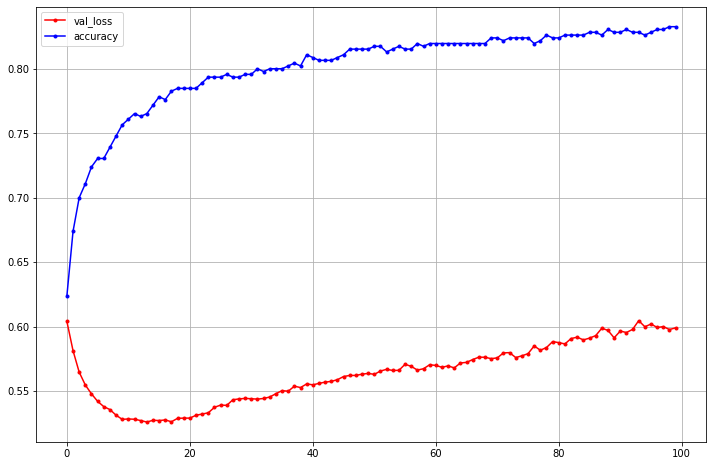

In [18]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, 'ro-', markersize=3, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=3, label='accuracy')
plt.legend()
plt.grid()
plt.show()